In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df = pd.read_csv('cs-training.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
df = df.drop(["Unnamed: 0"],axis=1)

In [6]:
df['NumberOfTime30-59DaysPastDueNotWorse'].loc[(df['NumberOfTime30-59DaysPastDueNotWorse']==98) | (df['NumberOfTime30-59DaysPastDueNotWorse']==96)] = df['NumberOfTime30-59DaysPastDueNotWorse'].median()
print ("max is ", df['NumberOfTime30-59DaysPastDueNotWorse'].max())

max is  13.0


/home/putus/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#see defaults vs nondefaults by creating new column called 'Default'
#df['SeriousDlqin2yrs'] = df.SeriousDlqin2yrs.map({0:'nodefault', 1:'default'})

In [8]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1.0,0.024926,63588.0,7,0,1,0,0.0


In [9]:
#can drop NaN values
trainDF = df.dropna() 

In [10]:
trainDF = trainDF[trainDF['MonthlyIncome']>0]
tes     = trainDF[trainDF['DebtRatio']<1]
tes.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1.0,0.024926,63588.0,7,0,1,0,0.0


In [11]:
ax = sns.countplot(x = tes.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
plt.show()

NameError: name 'sns' is not defined

In [12]:
trainDF = tes

In [13]:
tes.shape

(112915, 11)

In [14]:
y = np.array(trainDF['SeriousDlqin2yrs'].astype("float"))

In [15]:
X = np.array(trainDF[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']].astype('float'))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(1)
model = ExtraTreesClassifier()
model.fit(X, y)
feature_importance=model.feature_importances_
print(model.feature_importances_)

[ 0.1569704   0.12597469  0.06947406  0.15207713  0.1524086   0.10497251
  0.08882066  0.04155861  0.05348537  0.05425797]


In [18]:
tab = trainDF[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']]

<IPython.core.display.Javascript object>


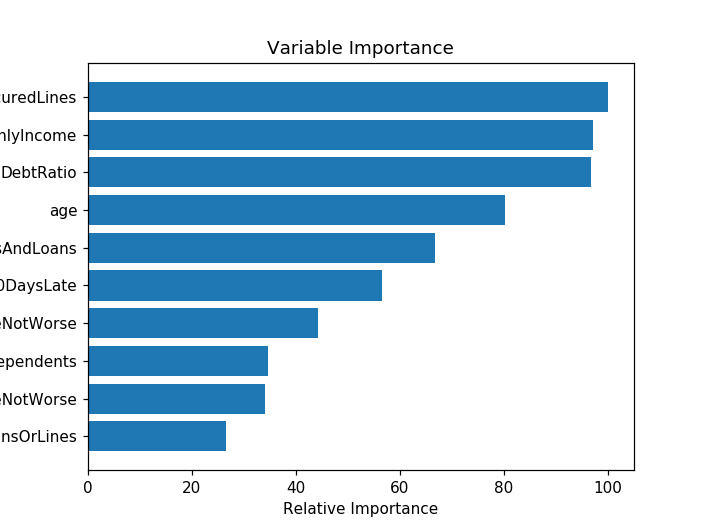

In [19]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .8
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, tab.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# SVM

In [20]:
from sklearn import svm

In [21]:
features = np.array(trainDF[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
                   'MonthlyIncome']].astype("float"))
lable   = np.array(trainDF['SeriousDlqin2yrs'].astype("float"))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features,lable, test_size=0.33, random_state=42)

In [35]:
clf = svm.SVC() # svm classifer

In [36]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve

In [38]:
result1 = clf.predict(X_test)

In [39]:
confusion_matrix(y_test,result1)

array([[34771,    10],
       [ 2478,     3]])

In [40]:
accuracy_score(y_test,result1)

0.93322956363050824

In [41]:
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [42]:
y_score = clf.decision_function(X_test)

In [43]:
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.09


<IPython.core.display.Javascript object>


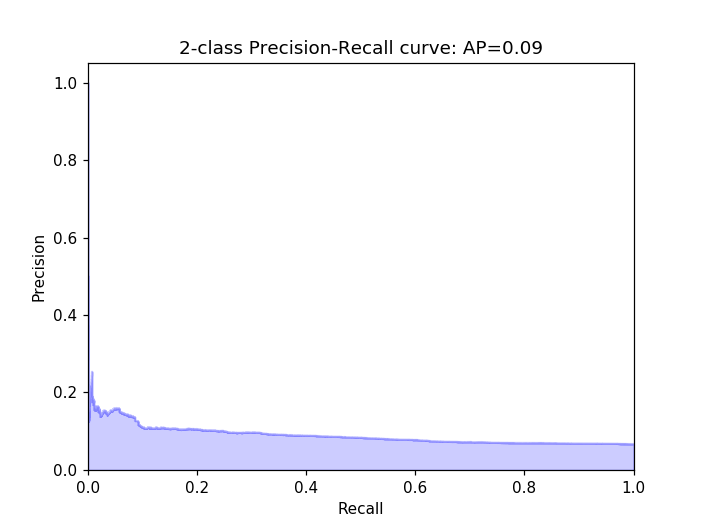

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

In [44]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [48]:
result2 = clf2.predict(X_test)

In [49]:
confusion_matrix(y_test,result2)

array([[34781,     0],
       [ 2481,     0]])

In [50]:
accuracy_score(y_test,result2)

0.93341742257527771

# Boosted Tree

In [52]:
import xgboost as xgb

In [53]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, min_child_weight=16, subsample=0.35000000000000003) # boosted tree classifire
model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=16, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.35000000000000003)

In [54]:
pred = model_xgboost.predict(X_test)
print(accuracy_score(pred,y_test))

0.932880682733


In [55]:
confusion_matrix(y_test,pred)

array([[34698,    83],
       [ 2418,    63]])

In [56]:
average_precision = average_precision_score(y_test,pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.26


<IPython.core.display.Javascript object>


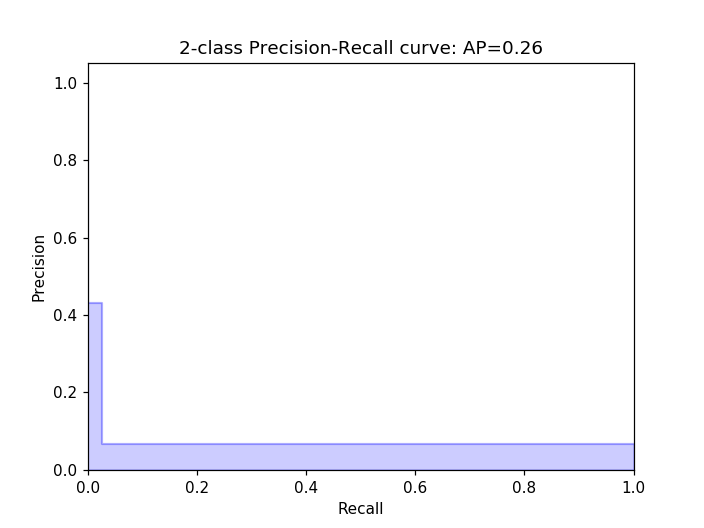

Text(0.5,1,'2-class Precision-Recall curve: AP=0.26')

In [57]:
precision, recall, _ = precision_recall_curve(y_test,pred )

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [58]:
from sklearn.neighbors import NearestNeighbors

In [59]:
from sklearn.cluster import KMeans

In [60]:
nbrs = NearestNeighbors().fit(features)

In [61]:
estimators = [('k_means_2', KMeans(n_clusters=2))]
np.random.seed(5)

In [62]:
f1 = np.array(trainDF['RevolvingUtilizationOfUnsecuredLines'])
f2 = np.array(trainDF['DebtRatio'].astype('float'))
f3 = np.array(trainDF['MonthlyIncome'].astype('float'))

<IPython.core.display.Javascript object>


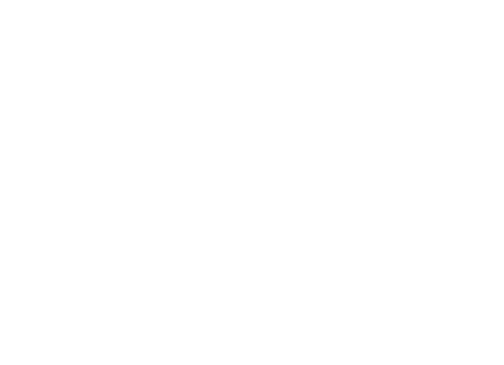

In [63]:
from mpl_toolkits.mplot3d import Axes3D
fignum = 1
titles = ['2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=150)
    est.fit(features)
    labels = est.labels_

    ax.scatter(f1,f2,f3,c=lable.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('f1')
    ax.set_ylabel('f2')
    ax.set_zlabel('f3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    plt.savefig('sample.png')